In [12]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl

%pylab inline
np.random.seed(99)

Populating the interactive namespace from numpy and matplotlib


In [18]:
def one_deg_fit(a, b, x):
    y = a*x + b
    error = np.random.randn(len(x))
    y = y + error
    return (y)

In [21]:
x = np.random.randn(100)
y = one_deg_fit(1,2,x)

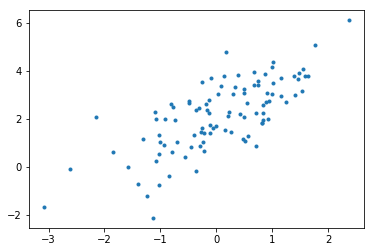

In [24]:
pl.plot(x,y, '.');

In [32]:
df = pd.DataFrame({'x':x, 'y': y})
reg1 = smf.ols('y ~ x', df).fit()

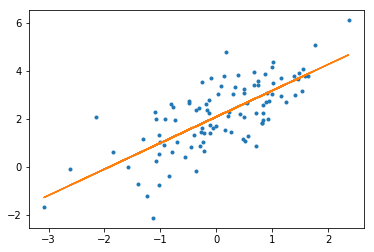

In [33]:
pl.plot(x,y, '.');
pl.plot(x, reg1.predict(), '-')

In [34]:
reg2 = smf.ols('y ~ I(x**2) + x', df).fit()

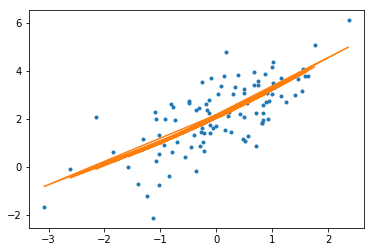

In [41]:
pl.plot(df.x, df.y, '.');
pl.plot(df.x, reg2.predict(), '-')

In [43]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     113.0
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           5.26e-18
Time:                        10:54:58   Log-Likelihood:                -141.66
No. Observations:                 100   AIC:                             287.3
Df Residuals:                      98   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0880      0.101     20.670      0.000       1.888       2.288
x              1.0898      0.103     10.628      0.000       0.886       1.293
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.142
Skew:                          -0.092   Prob(JB):                        0.932
Kurtosis:                       2.988   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     56.67
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           4.97e-17
Time:                        10:55:06   Log-Likelihood:                -141.29
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      97   BIC:                             296.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0280      0.124     16.395      0.000       1.783       2.274
I(x ** 2)      0.0605      0.072      0.843      0.401      -0.082       0.203
x              1.1084      0.105     10.553      0.000       0.900       1.317
==============================================================================
Omnibus:                        0.177   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.098
Skew:                          -0.075   Prob(JB):                        0.952
Kurtosis:                       2.975   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# log likelihood
print(-2 * (-141.66 + 141.29))

# fail to reject null hypothesis
# we do not want the more complex model 

0.7400000000000091


In [52]:
reg2.compare_lr_test(reg1)

(0.73044566973157998, 0.3927387677284504, 1.0)